<a href="https://colab.research.google.com/github/Shriyanshh/DATA-620/blob/main/DATA_620_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- DATA 620
- Project 1
- Shri Tripathi

For your first project, you are asked to:

- Identify and load a network dataset that has some categorical information available for each node.
- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
- Compare your centrality measures across your categorical groups.

In [62]:
# Import the essential libraries for data analysis, network modeling, and visualization
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

## Load Dataset

In [63]:
# Read the CSV file directly from the GitHub repository into a pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/Shriyanshh/DATA-620/refs/heads/main/NYPD_Arrest_Data__Year_to_Date__20240612.csv")

# Display the DataFrame to ensure the data has been loaded correctly
df


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,...,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845),37.0,4.0,23.0,17.0,12424.0
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,...,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),16.0,2.0,49.0,49.0,17615.0
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,...,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526),62.0,3.0,41.0,64.0,15314.0
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,...,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),59.0,5.0,12.0,32.0,11270.0
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,...,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456),69.0,2.0,49.0,52.0,18181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,...,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761),21.0,2.0,45.0,35.0,18184.0
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,...,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151),11.0,4.0,10.0,7.0,12074.0
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,...,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104),55.0,2.0,17.0,46.0,17614.0
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,...,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515),42.0,2.0,37.0,53.0,13828.0


# Data Preparation

## Dataset

Among the 63,621 rows in this dataset, the following columns contain missing values: **PD_DESC**, **KY_CD**, **LAW_CAT_CD**, **Community Districts**, **Borough Boundaries**, **City Council Districts**, **Police Precincts**, and **Zip Codes**.    

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [65]:
# Check which columns contain any null (NaN) values
df.isnull().any()

# Determine the number of unique values in each column
df.nunique()


,0
ARREST_KEY,63621
ARREST_DATE,91
PD_CD,231
PD_DESC,221
KY_CD,66
OFNS_DESC,62
LAW_CODE,770
LAW_CAT_CD,6
ARREST_BORO,5
ARREST_PRECINCT,77


## Drop Columns

To streamline our analysis, we removed any columns deemed unnecessary. Specifically, we dropped the following columns: **'PD_CD'**, **'PD_DESC'**, **'KY_CD'**, **'LAW_CODE'**, **'JURISDICTION_CODE'**, **'Borough Boundaries'**, **'City Council Districts'**, **'Police Precincts'**, and **'Zip Codes'**.


In [66]:
# 1. Make a copy of the original DataFrame to preserve the raw data
arrest_data = df.copy()

# 2. List the columns that are not needed for our current analysis
drop_columns = [
    'PD_CD',
    'PD_DESC',
    'KY_CD',
    'LAW_CODE',
    'ARREST_PRECINCT',
    'JURISDICTION_CODE',
    'Borough Boundaries',
    'City Council Districts',
    'Police Precincts',
    'Zip Codes',
    'X_COORD_CD',
    'Y_COORD_CD',
    'Latitude',
    'Longitude',
    'New Georeferenced Column'
]

# 3. Drop the unnecessary columns from 'arrest_data'
arrest_data.drop(columns=drop_columns, inplace=True)

# 4. Display the updated DataFrame to confirm the columns have been removed
arrest_data


,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Community Districts
0,280255493,01/10/2024,ROBBERY,F,M,<18,M,BLACK,37.0
1,279805419,01/02/2024,RAPE,F,K,25-44,M,WHITE HISPANIC,16.0
2,279895750,01/03/2024,ASSAULT 3 & RELATED OFFENSES,M,Q,65+,F,WHITE,62.0
3,280809090,01/19/2024,DANGEROUS DRUGS,M,B,45-64,M,BLACK,59.0
4,280357135,01/11/2024,FELONY ASSAULT,F,K,25-44,F,BLACK,69.0
...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,PETIT LARCENY,M,K,45-64,M,WHITE HISPANIC,21.0
63617,283628088,03/12/2024,DANGEROUS DRUGS,M,M,45-64,M,BLACK,11.0
63618,283387006,03/07/2024,ROBBERY,F,K,25-44,M,BLACK,55.0
63619,283013910,03/01/2024,VEHICLE AND TRAFFIC LAWS,M,K,25-44,F,BLACK,42.0


In [67]:
arrest_data.isnull().any()

,0
ARREST_KEY,False
ARREST_DATE,False
OFNS_DESC,False
LAW_CAT_CD,True
ARREST_BORO,False
AGE_GROUP,False
PERP_SEX,False
PERP_RACE,False
Community Districts,True


In [68]:
# Calculate the total number of missing values in each column of 'arrest_data'
arrest_data.isnull().sum()


,0
ARREST_KEY,0
ARREST_DATE,0
OFNS_DESC,0
LAW_CAT_CD,402
ARREST_BORO,0
AGE_GROUP,0
PERP_SEX,0
PERP_RACE,0
Community Districts,5


In [69]:
# Drop all rows with missing values from 'arrest_data'
arrest_data.dropna(inplace=True)

# Display the updated DataFrame to confirm that rows with null values have been removed
arrest_data


,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Community Districts
0,280255493,01/10/2024,ROBBERY,F,M,<18,M,BLACK,37.0
1,279805419,01/02/2024,RAPE,F,K,25-44,M,WHITE HISPANIC,16.0
2,279895750,01/03/2024,ASSAULT 3 & RELATED OFFENSES,M,Q,65+,F,WHITE,62.0
3,280809090,01/19/2024,DANGEROUS DRUGS,M,B,45-64,M,BLACK,59.0
4,280357135,01/11/2024,FELONY ASSAULT,F,K,25-44,F,BLACK,69.0
...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,PETIT LARCENY,M,K,45-64,M,WHITE HISPANIC,21.0
63617,283628088,03/12/2024,DANGEROUS DRUGS,M,M,45-64,M,BLACK,11.0
63618,283387006,03/07/2024,ROBBERY,F,K,25-44,M,BLACK,55.0
63619,283013910,03/01/2024,VEHICLE AND TRAFFIC LAWS,M,K,25-44,F,BLACK,42.0


In [70]:
arrest_data.isnull().sum()

,0
ARREST_KEY,0
ARREST_DATE,0
OFNS_DESC,0
LAW_CAT_CD,0
ARREST_BORO,0
AGE_GROUP,0
PERP_SEX,0
PERP_RACE,0
Community Districts,0


# Creating Network Analysis for Crime vs Community District

In [71]:
G = nx.Graph()

In [72]:
grouped = df.groupby('Community Districts')['OFNS_DESC'].apply(list)
grouped

,OFNS_DESC
Community Districts,
1.0,"[DANGEROUS DRUGS, ARSON, ASSAULT 3 & RELATED O..."
2.0,"[ASSAULT 3 & RELATED OFFENSES, INTOXICATED & I..."
3.0,"[POSSESSION OF STOLEN PROPERTY, POSSESSION OF ..."
4.0,"[VEHICLE AND TRAFFIC LAWS, OFFENSES AGAINST PU..."
5.0,"[ARSON, VEHICLE AND TRAFFIC LAWS, VEHICLE AND ..."
...,...
67.0,"[POSSESSION OF STOLEN PROPERTY, ASSAULT 3 & RE..."
68.0,"[FELONY ASSAULT, ROBBERY, GRAND LARCENY, CRIMI..."
69.0,"[FELONY ASSAULT, FELONY ASSAULT, FELONY ASSAUL..."


In [73]:
grouped = df.groupby('Community Districts')['OFNS_DESC'].apply(list)

print(grouped)

Community Districts
1.0     [DANGEROUS DRUGS, ARSON, ASSAULT 3 & RELATED O...
2.0     [ASSAULT 3 & RELATED OFFENSES, INTOXICATED & I...
3.0     [POSSESSION OF STOLEN PROPERTY, POSSESSION OF ...
4.0     [VEHICLE AND TRAFFIC LAWS, OFFENSES AGAINST PU...
5.0     [ARSON, VEHICLE AND TRAFFIC LAWS, VEHICLE AND ...
                              ...                        
67.0    [POSSESSION OF STOLEN PROPERTY, ASSAULT 3 & RE...
68.0    [FELONY ASSAULT, ROBBERY, GRAND LARCENY, CRIMI...
69.0    [FELONY ASSAULT, FELONY ASSAULT, FELONY ASSAUL...
70.0    [PETIT LARCENY, ASSAULT 3 & RELATED OFFENSES, ...
71.0    [ASSAULT 3 & RELATED OFFENSES, GRAND LARCENY, ...
Name: OFNS_DESC, Length: 70, dtype: object


In [74]:
# Iterate over each community, along with the list of crimes associated with it
for community, crimes in grouped.items():

    # Add every crime within this community as a node in the graph
    for crime in crimes:
        G.add_node(crime)

    # For every pair of crimes in the same community, add an edge connecting them.
    # We also label the edge with the corresponding community for reference.
    for crime1, crime2 in combinations(crimes, 2):
        G.add_edge(crime1, crime2, community=community)


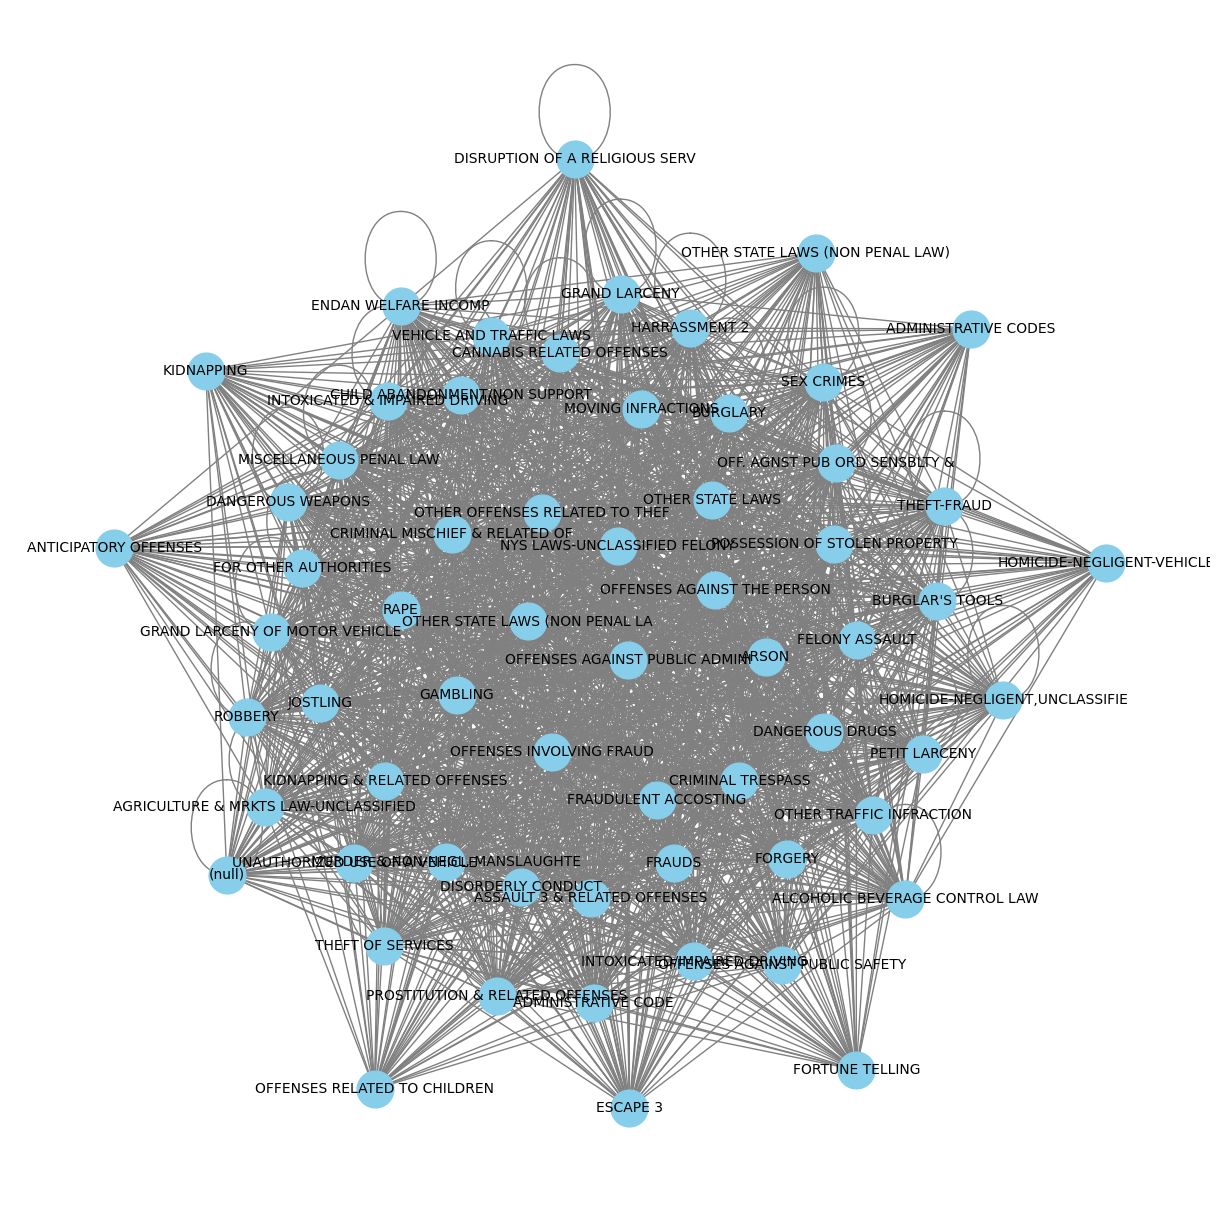

In [75]:
# Set the figure size to 12x12 inches for better visibility
plt.figure(figsize=(12, 12))

# Generate a layout for our network; spring_layout positions nodes based on force-directed placement
pos = nx.spring_layout(G)

# Draw the network graph:
# - G is the graph
# - pos is the position dictionary from spring_layout
# - with_labels=True displays node labels
# - node_size controls the size of nodes
# - node_color sets the fill color of the nodes
# - font_size, font_color control label size and color
# - edge_color sets the color of the edges
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='skyblue',
    font_size=10,
    font_color='black',
    edge_color='gray'
)

# Display the plotted graph
plt.show()


**Compute the degree centrality, which captures how many connections each node has, and the eigenvector centrality, which reflects a node’s overall influence based on its connections to other highly connected nodes. Next, consolidate both measures into a single DataFrame and generate summary statistics for each. Finally, offer an interpretation of those statistics to highlight any meaningful insights or patterns they reveal.**

In [76]:
# Calculate the degree centrality, which measures the proportion of possible connections each node actually has
degree_centrality = nx.degree_centrality(G)

# Calculate the eigenvector centrality, which identifies nodes that are connected to other highly connected or influential nodes
eigenvector_centrality = nx.eigenvector_centrality(G)

# Combine both measures into a single DataFrame for ease of analysis
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})

# Generate descriptive statistics for both centrality measures
summary_stats = centrality_df.describe()
print(summary_stats)


       Degree Centrality  Eigenvector Centrality
count          62.000000               62.000000
mean            0.958752                0.126360
std             0.114494                0.012837
min             0.655738                0.091504
25%             0.938525                0.124734
50%             1.032787                0.134423
75%             1.032787                0.134423
max             1.032787                0.134423


## Filter Fop Centrality:

In [77]:

sorted_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False)
print("\nTop Degree Centrality:")
print(sorted_degree.head())

sorted_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)
print("\nTop Eigenvector Centrality:")
print(sorted_eigenvector.head())


Top Degree Centrality:
                                Degree Centrality  Eigenvector Centrality
DANGEROUS DRUGS                          1.032787                0.134423
POSSESSION OF STOLEN PROPERTY            1.032787                0.134423
INTOXICATED/IMPAIRED DRIVING             1.032787                0.134423
MURDER & NON-NEGL. MANSLAUGHTE           1.032787                0.134423
FOR OTHER AUTHORITIES                    1.032787                0.134423

Top Eigenvector Centrality:
                                Degree Centrality  Eigenvector Centrality
DANGEROUS DRUGS                          1.032787                0.134423
POSSESSION OF STOLEN PROPERTY            1.032787                0.134423
INTOXICATED/IMPAIRED DRIVING             1.032787                0.134423
MURDER & NON-NEGL. MANSLAUGHTE           1.032787                0.134423
FOR OTHER AUTHORITIES                    1.032787                0.134423


# Analysis

**1. Dataset Overview and Cleaning**

- **Dataset Size and Structure:** Initially, the dataset contains 63,621 rows and 24 columns. After removing unnecessary columns and handling null values, we end up with a refined dataset that focuses on variables such as offense descriptions (OFNS_DESC), law categories, boroughs, age groups, sex, race, and community districts.  
- **Categorical Information:** Each network node represents an offense description, while community districts serve as the basis for connecting offenses.

**2. Network Construction**

- **Nodes and Edges:** Each offense description is a node, and edges are formed between offenses that occur within the same community district.  
- **Graph Visualization:** A spring layout provides a visual map of offenses, revealing clusters of offenses that commonly co-occur in the same community districts.

**3. Centrality Measures Calculation**

- **Degree Centrality:** Reflects how many direct ties each offense has in the network; a high degree means frequent co-occurrences with other offenses.  
- **Eigenvector Centrality:** Goes beyond the number of connections, measuring how connected a node is to other highly connected nodes.

**4. Summary Statistics Interpretation**

**Degree Centrality**

- **Mean:** At roughly 0.959, most offenses are connected to nearly 95.9% of other offenses.  
- **Standard Deviation:** With a low value of 0.114, the data points cluster close to the mean, indicating minimal variation in how connected offenses are.  
- **Minimum and Maximum:** Scores range from 0.656 to 1.033, showing a narrow spread where certain offenses are marginally more central than others.

**Eigenvector Centrality**

- **Mean:** The average of 0.126, ranging from 0.092 to 0.134, points to minor differences in the influence levels of offenses.  
- **Standard Deviation:** An extremely low value of 0.0128 underscores the similarity in offenses’ overall influence in the network.

**5. Top Centrality Analysis**

- **Top Degree Centrality Offenses:** Offenses like "DANGEROUS DRUGS," "POSSESSION OF STOLEN PROPERTY," and "INTOXICATED/IMPAIRED DRIVING" score highest, suggesting they co-occur with numerous other offenses across multiple districts.  
- **Top Eigenvector Centrality Offenses:** These same offenses also top the eigenvector centrality list, indicating they’re influentially linked to other pivotal offenses. This consistency highlights their role as network hubs.

---

### Additional Analysis

**1. Community District Analysis**  
- **Offense Distribution by District:** Examining which offenses appear most frequently in each community district can help pinpoint high-crime areas, guiding targeted policy-making and resource allocation.

**2. Category-Wise Centrality Comparison**  
- **By Law Category (LAW_CAT_CD):** Comparing centralities for categories (e.g., felonies vs. misdemeanors) can uncover which crime types are more intertwined.  
- **By Borough (ARREST_BORO):** Analyzing centralities by borough can reveal geographic patterns in crime clusters.

**3. Demographic Influence**  
- **Age Group and Race:** Checking whether certain age groups or races are more linked to highly central offenses can shed light on social factors contributing to crime patterns.

**4. Temporal Analysis**  
- **Seasonal/Monthly Trends:** Incorporating time-based data can reveal whether the interconnectedness of offenses fluctuates seasonally or monthly, highlighting periodic shifts in crime.

**5. Network Modularity and Clustering**  
- **Community Detection:** Applying clustering methods can identify groups of offenses that frequently appear together, leading to deeper insights into the structure and organization of crime patterns within the network.

## Conclusion

The centrality measurements—particularly degree and eigenvector centrality—offer a clear picture of how crimes intersect within community districts. By examining these metrics across diverse categories, demographics, and time frames, we gain deeper insight into recurring crime trends. Such understanding aids in devising targeted policies and interventions that can more effectively deter and address criminal activity.